In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
msm_df = pd.read_csv("data/US MSM Estimates Data 2013.csv")
msm_df['county_code'] = msm_df.STATEFP*1000 + msm_df.COUNTYFP
msm_df['county_code'] = msm_df.county_code.astype(int)
msm_df['%msm12month'] = 100 * (msm_df.MSM12MTH / msm_df.ADULTMEN)
msm_df['%msm5yr'] = 100 * (msm_df.MSM5YEAR / msm_df.ADULTMEN)
msm_df.drop(['REGCODE', 
             'DIVCODE', 
             'STATEFP', 
             'COUNTYFP', 
             'CSACODE', 
             'CBSACODE', 
             'METDCODE', 
             'METMICSA', 
             'CENTOUTL'], axis=1, inplace=True)
msm_df.head(20)

,ADULTMEN,MSM12MTH,MSM5YEAR,county_code,%msm12month,%msm5yr
0,19410,333,514,1001,1.715611,2.648120
1,69724,925,1429,1003,1.326659,2.049509
2,11567,82,127,1005,0.708913,1.097951
3,9508,119,184,1007,1.251578,1.935212
4,21368,601,928,1009,2.812617,4.342943
5,4597,73,113,1011,1.587992,2.458125
6,7088,39,60,1013,0.550226,0.846501
7,43018,692,1070,1015,1.608629,2.487331
8,12467,122,188,1017,0.978583,1.507981
9,10194,56,87,1019,0.549343,0.853443


Text(0.5,1,'% MSM by county (5 years)')

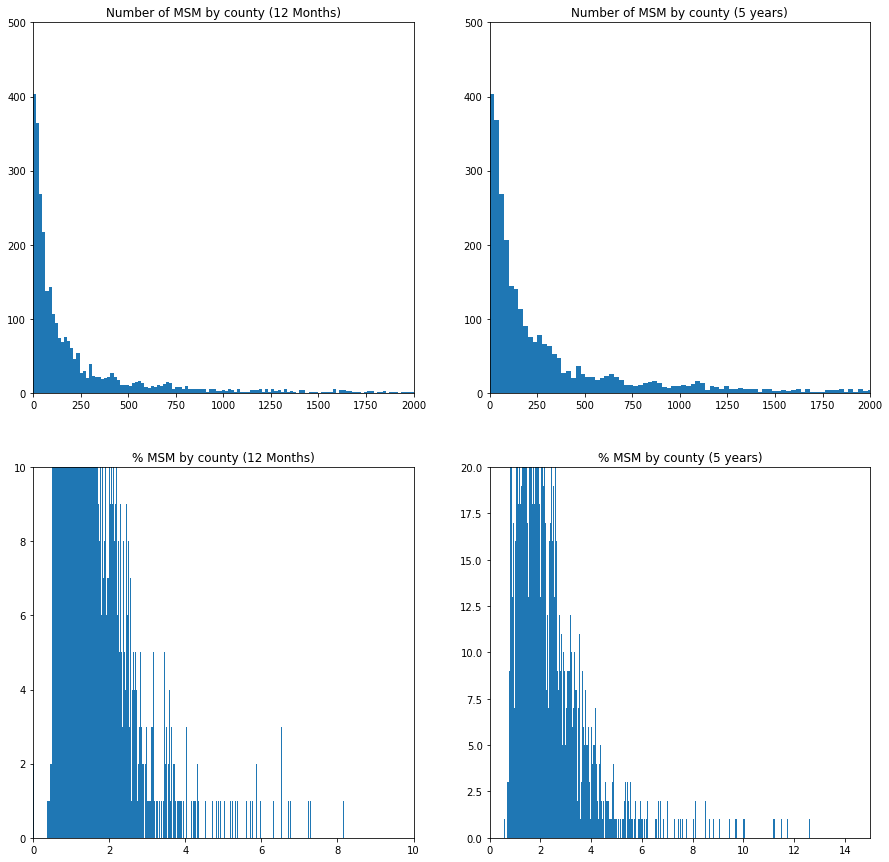

In [246]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.hist(msm_df.MSM12MTH, bins=10000)
ax1.set_xlim(xmin=0, xmax=2000)
ax1.set_ylim(ymin=0, ymax=500)
ax1.set_title('Number of MSM by county (12 Months)')

ax2 = fig.add_subplot(222)
ax2.hist(msm_df.MSM5YEAR, bins=10000)
ax2.set_xlim(xmin=0, xmax=2000)
ax2.set_ylim(ymin=0, ymax=500)
ax2.set_title('Number of MSM by county (5 years)')

ax3 = fig.add_subplot(223)
ax3.hist(msm_df['%msm12month'], bins=1000)
ax3.set_xlim(xmin=0, xmax=10)
ax3.set_ylim(ymin=0, ymax=10)
ax3.set_title('% MSM by county (12 Months)')

ax4 = fig.add_subplot(224)
ax4.hist(msm_df['%msm5yr'], bins=1000)
ax4.set_xlim(xmin=0, xmax=15)
ax4.set_ylim(ymin=0, ymax=20)
ax4.set_title('% MSM by county (5 years)')

In [239]:
msm_df.describe()

,ADULTMEN,MSM12MTH,MSM5YEAR,county_code,%msm12month,%msm5yr
count,3.143000e+03,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,3.673678e+04,926.811645,1432.732739,30390.411709,1.293352,1.998884
std,1.163611e+05,4856.553399,7507.582210,15164.717720,1.011165,1.563736
min,3.400000e+01,0.000000,0.000000,1001.000000,0.000000,0.000000
25%,4.259000e+03,34.000000,52.000000,18178.000000,0.560769,0.859129
50%,9.865000e+03,103.000000,159.000000,29177.000000,1.020971,1.577050
75%,2.532600e+04,350.500000,542.500000,45082.000000,1.613523,2.490987
max,3.666190e+06,162706.000000,251521.000000,56045.000000,15.166163,23.444109


In [49]:
opiod_df = pd.read_table('data/tmp/countydata.tsv',header=0)
opiod_df['county_code'] = opiod_df.STATEFP*1000 + opiod_df.COUNTYFP
opiod_df['county_code'] = opiod_df.county_code.astype(int)
opiod_df.head(20)

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,COUNTY,STATE,STATEABBREVIATION,county_code
0,1,1,2017,bup_phys,2.0,Autauga County,Alabama,AL,1001
1,1,3,2017,bup_phys,13.0,Baldwin County,Alabama,AL,1003
2,1,5,2017,bup_phys,0.0,Barbour County,Alabama,AL,1005
3,1,7,2017,bup_phys,0.0,Bibb County,Alabama,AL,1007
4,1,9,2017,bup_phys,1.0,Blount County,Alabama,AL,1009
5,1,9,2017,bup_phys,1.0,Blount County,Alabama,AL,1009
6,1,11,2017,bup_phys,0.0,Bullock County,Alabama,AL,1011
7,1,13,2017,bup_phys,0.0,Butler County,Alabama,AL,1013
8,1,15,2017,bup_phys,9.0,Calhoun County,Alabama,AL,1015
9,1,17,2017,bup_phys,1.0,Chambers County,Alabama,AL,1017


In [121]:
opiod_df_wide = opiod_df.pivot_table(values='VALUE', index=['county_code',
                                                            'COUNTY',
                                                            'STATEABBREVIATION',
                                                            'YEAR'], columns='INDICATOR').reset_index()
opiod_df_wide.drop(['CDC_consult', 'vulnerable_rank'], axis=1, inplace=True)
opiod_df_wide = opiod_df_wide[opiod_df_wide.YEAR >= 2008]
opiod_df_wide[['HIVdiagnoses', 
               'HIVincidence', 
               'HIVprevalence', 
               'HIVprevalence', 
               'PLHIV', 
               'drugdeathrate', 
               'drugdeaths']] = opiod_df_wide[['HIVdiagnoses', 
                                               'HIVincidence', 
                                               'HIVprevalence', 
                                               'HIVprevalence',
                                               'PLHIV',
                                               'drugdeathrate', 
                                               'drugdeaths']].fillna(0)
opiod_df_wide.head(20)

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
9,1001,Autauga County,AL,2008,0.0,8.0,19.8,0.0,NaN,0.0,...,0.0,6.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1001,Autauga County,AL,2009,0.0,7.0,17.1,0.0,NaN,0.0,...,0.0,6.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1001,Autauga County,AL,2010,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,8.1,0.0,NaN,1050.8,NaN,NaN,NaN,NaN,NaN
12,1001,Autauga County,AL,2011,0.0,7.0,15.5,0.0,NaN,0.0,...,0.0,8.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1001,Autauga County,AL,2012,0.0,7.0,15.5,0.0,NaN,0.0,...,0.0,8.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1001,Autauga County,AL,2013,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,8.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1001,Autauga County,AL,2014,0.0,6.0,13.2,196.6,NaN,0.0,...,0.0,10.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,0.0,10.1,0.0,NaN,1084.0,NaN,NaN,2.34,10.1,NaN
17,1001,Autauga County,AL,2016,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,0.0,2.56,NaN,5.12,NaN,NaN,8.9,95.70
18,1001,Autauga County,AL,2017,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [122]:
opiod_df_wide.describe()

INDICATOR,county_code,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,...,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
count,32200.000000,32200.000000,32200.000000,32200.000000,32200.000000,32200.000000,9660.000000,32200.000000,9660.000000,32200.000000,...,32200.000000,25136.000000,32200.000000,3141.000000,5702.000000,3141.000000,3220.000000,3123.000000,6440.000000,3141.000000
mean,31393.605280,2012.500000,0.035124,11.085963,3.801071,27.929543,3.256729,0.024969,2.898551,2.029472,...,2.132848,11.180275,8.944441,2.576110,770.085602,4.313359,0.091615,1.686763,12.675280,88.708373
std,16289.801881,2.872326,0.311247,70.310344,14.182307,103.324147,8.474179,0.260791,7.300968,5.854470,...,7.510544,6.375919,37.077574,0.357325,499.094775,0.582850,0.423000,1.057671,5.432198,3.226387
min,1001.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.930000,0.000000,2.950000,0.000000,0.010000,1.600000,77.020000
25%,19032.500000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.100000,0.000000,2.320000,440.450000,3.880000,0.000000,1.000000,8.700000,86.480000
50%,30024.000000,2012.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,10.100000,0.000000,2.540000,689.550000,4.320000,0.000000,1.530000,12.000000,88.790000
75%,46105.500000,2015.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,2.000000,...,0.000000,14.100000,0.000000,2.790000,994.900000,4.700000,0.000000,2.165000,15.700000,90.830000
max,72153.000000,2017.000000,16.000000,2385.000000,1509.400000,2602.200000,215.000000,16.000000,158.000000,137.000000,...,141.200000,30.100000,1114.000000,4.290000,5542.600000,5.890000,6.000000,16.510000,56.300000,100.000000


In [250]:
opiod_df_wide_17 = opiod_df_wide[opiod_df_wide.YEAR == 2017]
df_num_SSP = opiod_df_wide_17[['num_SSPs', 'county_code']]
df_num_SSP.head()

INDICATOR,num_SSPs,county_code
18,0.0,1001
37,0.0,1003
56,0.0,1005
75,0.0,1007
94,0.0,1009


In [251]:
opiod_df_wide_17 = opiod_df_wide[opiod_df_wide.YEAR == 2017]
df_bup_phys = opiod_df_wide_17[['bup_phys', 'county_code']]
df_bup_phys.head()

INDICATOR,bup_phys,county_code
18,2.0,1001
37,13.0,1003
56,0.0,1005
75,0.0,1007
94,1.0,1009


In [252]:
opiod_df_wide_16 = opiod_df_wide[opiod_df_wide.YEAR == 2016]
df_drugdep = opiod_df_wide_16[['drugdep', 'county_code']]
df_drugdep.head()

INDICATOR,drugdep,county_code
17,2.56,1001
36,2.54,1003
55,2.54,1005
74,2.58,1007
93,2.58,1009


In [253]:
opiod_df_wide_16 = opiod_df_wide[opiod_df_wide.YEAR == 2016]
df_pctunmetneed = opiod_df_wide_16[['pctunmetneed', 'county_code']]
df_pctunmetneed.head()

INDICATOR,pctunmetneed,county_code
17,95.70,1001
36,91.34,1003
55,91.34,1005
74,91.86,1007
93,91.86,1009


In [254]:
opiod_df_wide_16 = opiod_df_wide[opiod_df_wide.YEAR == 2016]
df_nonmedpain = opiod_df_wide_16[['nonmedpain', 'county_code']]
df_nonmedpain.head()

INDICATOR,nonmedpain,county_code
17,5.12,1001
36,5.27,1003
55,5.27,1005
74,5.62,1007
93,5.62,1009


In [255]:
opiod_df_wide.columns

Index(['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR', 'AMAT_fac',
       'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'bup_phys', 'drugdeathrate', 'drugdeathrate_est', 'drugdeaths',
       'drugdep', 'mme_percap', 'nonmedpain', 'num_SSPs', 'partD30dayrxrate',
       'pctunins', 'pctunmetneed'],
      dtype='object', name='INDICATOR')

In [257]:
opiod_df_15 = opiod_df_wide[opiod_df_wide.YEAR == 2015]
opiod_df_15.drop(['num_SSPs', 'bup_phys', 'drugdep', 'pctunmetneed', 'nonmedpain'], axis=1, inplace=True)
opiod_df_15.head()

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins
16,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1
35,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0
54,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5
73,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7
92,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6


In [258]:
opiod_df_15.describe()

INDICATOR,county_code,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,...,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins
count,3220.000000,3220.0,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3.142000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3142.000000,3220.000000,2963.000000,3123.000000,3220.000000
mean,31393.605280,2015.0,0.083540,11.584783,3.946366,141.788012,3.237267,0.057453,2.876398,2.206832,...,1.021313e+05,3.702484,1.299068,0.686646,3.624534,14.534914,14.444720,704.815964,1.686763,13.240559
std,16292.078954,0.0,0.445379,69.097398,16.380541,197.309657,8.501461,0.364796,7.320786,5.984869,...,3.281275e+05,11.605627,4.449258,2.548006,9.742102,6.847687,47.171888,459.743474,1.057671,5.505517
min,1001.000000,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.600000
25%,19032.500000,2015.0,0.000000,0.000000,0.000000,20.150000,0.000000,0.000000,0.000000,0.000000,...,1.098750e+04,0.000000,0.000000,0.000000,0.000000,10.100000,0.000000,399.600000,1.000000,9.200000
50%,30024.000000,2015.0,0.000000,0.000000,0.000000,86.500000,1.000000,0.000000,1.000000,1.000000,...,2.566700e+04,1.000000,0.000000,0.000000,0.000000,14.100000,0.000000,648.700000,1.530000,12.700000
75%,46105.500000,2015.0,0.000000,0.000000,0.000000,180.925000,3.000000,0.000000,3.000000,2.000000,...,6.757525e+04,3.000000,1.000000,0.000000,0.000000,18.100000,11.000000,928.750000,2.165000,16.300000
max,72153.000000,2015.0,8.000000,1972.000000,771.400000,2590.200000,192.000000,5.000000,133.000000,125.000000,...,1.011226e+07,328.000000,97.000000,54.000000,141.200000,30.100000,732.000000,4086.900000,16.510000,56.300000


In [259]:
opiod_df_15 = opiod_df_15.merge(df_num_SSP, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_bup_phys, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_drugdep, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_pctunmetneed, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_nonmedpain, on='county_code')
opiod_df_15.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,10.1,0.0,1084.0,2.34,10.1,0.0,2.0,2.56,95.70,5.12
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,20.1,43.0,1148.5,2.56,13.0,0.0,13.0,2.54,91.34,5.27
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,6.1,0.0,577.6,1.46,15.5,0.0,0.0,2.54,91.34,5.27
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,14.1,0.0,563.0,0.39,9.7,0.0,0.0,2.58,91.86,5.62
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,16.1,11.0,459.0,1.22,11.6,0.0,1.0,2.58,91.86,5.62


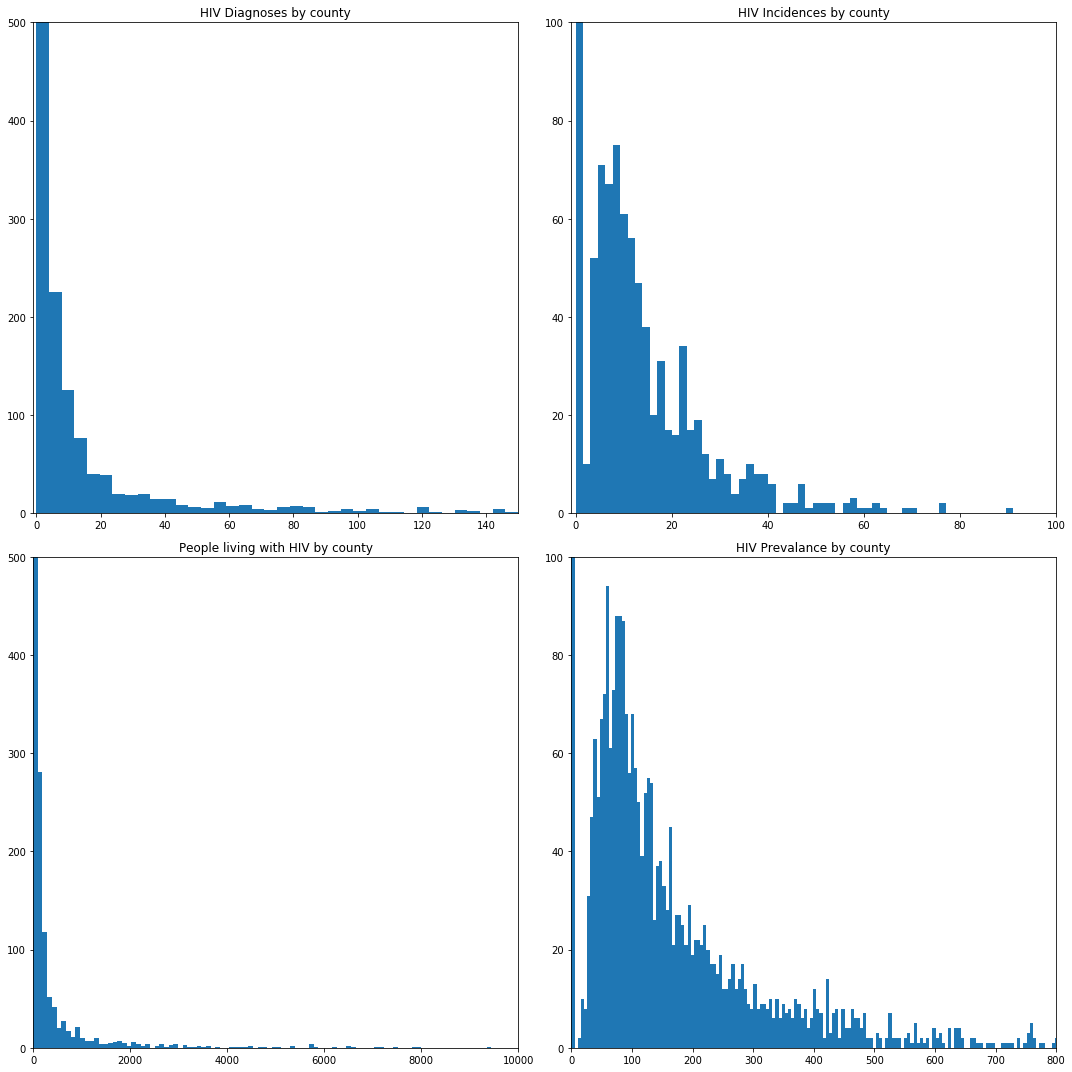

In [323]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.hist(opiod_df_15.HIVdiagnoses, bins=500);
ax1.set_xlim(xmin=-1, xmax=150)
ax1.set_ylim(ymin=0, ymax=500)
ax1.set_title('HIV Diagnoses by county')

ax2 = fig.add_subplot(222)
ax2.hist(opiod_df_15.HIVincidence, bins=500);
ax2.set_xlim(xmin=-1, xmax=100)
ax2.set_ylim(ymin=0, ymax=100)
ax2.set_title('HIV Incidences by county')

ax3 = fig.add_subplot(223)
ax3.hist(opiod_df_15.PLHIV, bins=500);
ax3.set_xlim(xmin=-1, xmax=10000)
ax3.set_ylim(ymin=0, ymax=500)
ax3.set_title('People living with HIV by county')

ax4 = fig.add_subplot(224)
ax4.hist(opiod_df_15.HIVprevalence, bins=500);
ax4.set_xlim(xmin=-1, xmax=800)
ax4.set_ylim(ymin=0, ymax=100)
ax4.set_title('HIV Prevalance by county')

plt.tight_layout()

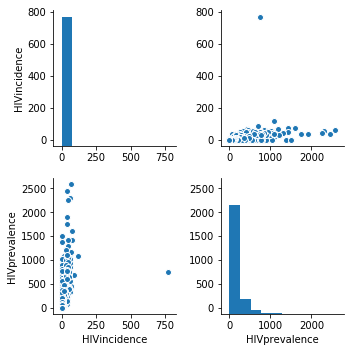

In [215]:
g = sns.pairplot(opiod_df_15, vars=['HIVincidence', 
                                    'HIVprevalence'])

Text(0,0.5,'HIV prevalence')

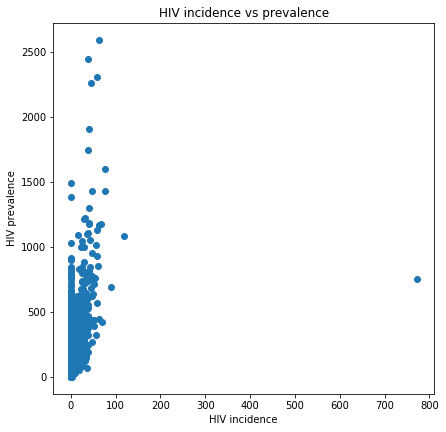

In [217]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.scatter(opiod_df_15.HIVincidence, opiod_df_15.HIVprevalence)
ax1.set_title('HIV incidence vs prevalence')
ax1.set_xlabel('HIV incidence')
ax1.set_ylabel('HIV prevalence')


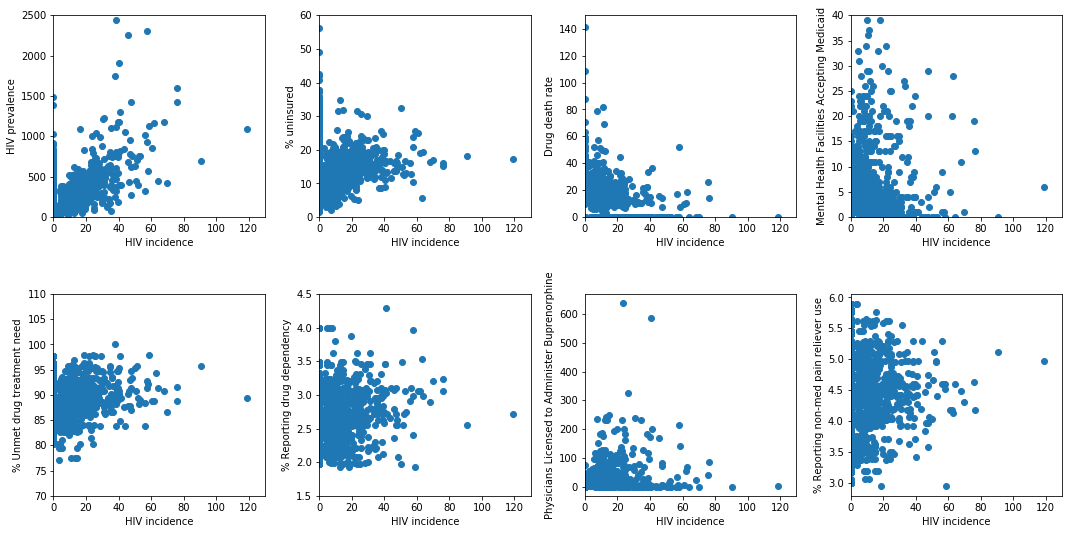

In [312]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(441)
ax1.scatter(opiod_df_15.HIVincidence, opiod_df_15.HIVprevalence)
ax1.set_xlim(xmin=0, xmax=130)
ax1.set_ylim(ymin=0, ymax=2500)
#ax1.set_title('HIV incidence vs prevalence')
ax1.set_xlabel('HIV incidence')
ax1.set_ylabel('HIV prevalence')

ax2 = fig.add_subplot(442)
ax2.scatter(opiod_df_15.HIVincidence, opiod_df_15.pctunins)
ax2.set_xlim(xmin=0, xmax=130)
ax2.set_ylim(ymin=0, ymax=60)
#ax2.set_title('HIV incidence vs % uninsured')
ax2.set_xlabel('HIV incidence')
ax2.set_ylabel('% uninsured')

ax3 = fig.add_subplot(443)
ax3.scatter(opiod_df_15.HIVincidence, opiod_df_15.drugdeathrate)
ax3.set_xlim(xmin=0, xmax=130)
ax3.set_ylim(ymin=0, ymax=150)
#ax3.set_title('HIV incidence vs Drug death rate')
ax3.set_xlabel('HIV incidence')
ax3.set_ylabel('Drug death rate')


ax4 = fig.add_subplot(444)
ax4.scatter(opiod_df_15.HIVincidence, opiod_df_15.Med_MH_fac)
ax4.set_xlim(xmin=0, xmax=130)
ax4.set_ylim(ymin=0, ymax=40)
#ax4.set_title('HIV incidence vs Mental Health Facilities')
ax4.set_xlabel('HIV incidence')
ax4.set_ylabel('Mental Health Facilities Accepting Medicaid')

ax5 = fig.add_subplot(445)
ax5.scatter(opiod_df_15.HIVincidence, opiod_df_15.pctunmetneed)
ax5.set_xlim(xmin=0, xmax=130)
ax5.set_ylim(ymin=70, ymax=110)
#ax5.set_title('HIV incidence vs % Unmet drug treatment need')
ax5.set_xlabel('HIV incidence')
ax5.set_ylabel('% Unmet drug treatment need')

ax6 = fig.add_subplot(446)
ax6.scatter(opiod_df_15.HIVincidence, opiod_df_15.drugdep)
ax6.set_xlim(xmin=0, xmax=130)
ax6.set_ylim(ymin=1.5, ymax=4.5)
#ax6.set_title('HIV incidence vs % % Reporting drug dependency')
ax6.set_xlabel('HIV incidence')
ax6.set_ylabel('% Reporting drug dependency')

ax7 = fig.add_subplot(447)
ax7.scatter(opiod_df_15.HIVincidence, opiod_df_15.bup_phys)
ax7.set_xlim(xmin=0, xmax=130)
#ax1.set_ylim(ymin=1.5, ymax=4.5)
#ax7.set_title('HIV incidence vs Physicians Licensed to Administer Buprenorphine')
ax7.set_xlabel('HIV incidence')
ax7.set_ylabel('Physicians Licensed to Administer Buprenorphine')

ax8 = fig.add_subplot(448)
ax8.scatter(opiod_df_15.HIVincidence, opiod_df_15.nonmedpain)
ax8.set_xlim(xmin=0, xmax=130)
#ax1.set_ylim(ymin=1.5, ymax=4.5)
#ax8.set_title('HIV incidence vs % Reporting non-med pain reliever use')
ax8.set_xlabel('HIV incidence')
ax8.set_ylabel('% Reporting non-med pain reliever use')

plt.tight_layout()

Text(0.5,0,'Estimated Drug Death Rate (Age Adjusted)')

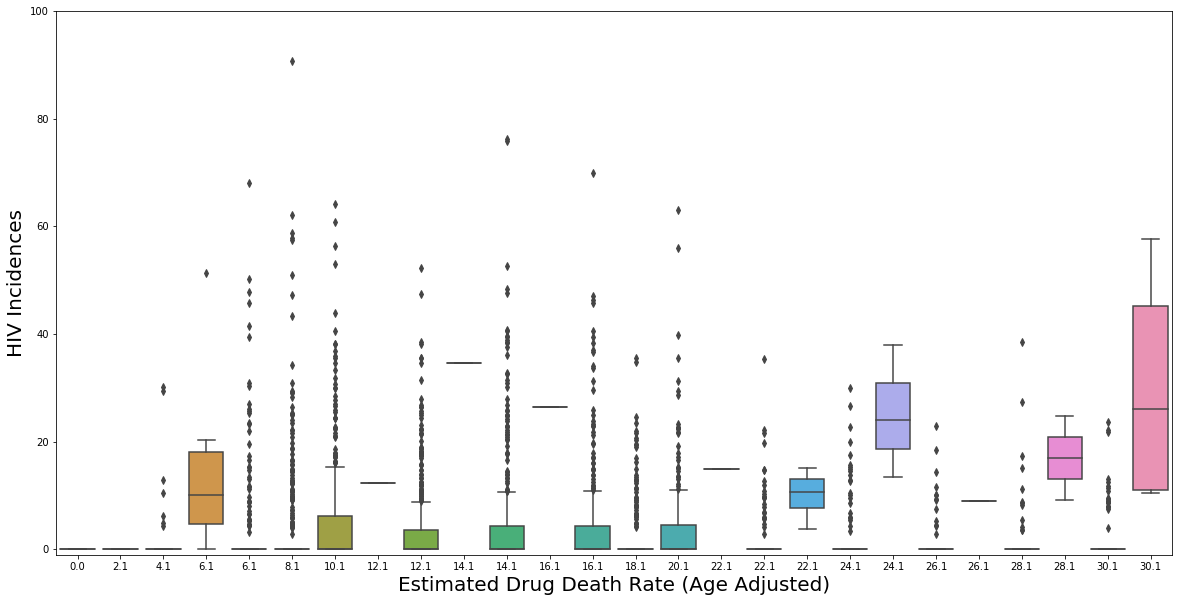

In [214]:
plt.subplots(figsize=(20,10))
sns.boxplot(x="drugdeathrate_est", y="HIVincidence", data=opiod_df_15)
plt.ylim(-1, 100)
plt.ylabel('HIV Incidences', fontsize=20)
plt.xlabel('Estimated Drug Death Rate (Age Adjusted)', fontsize=20)

Text(0.5,0,'Number of all medication treatment facilities')

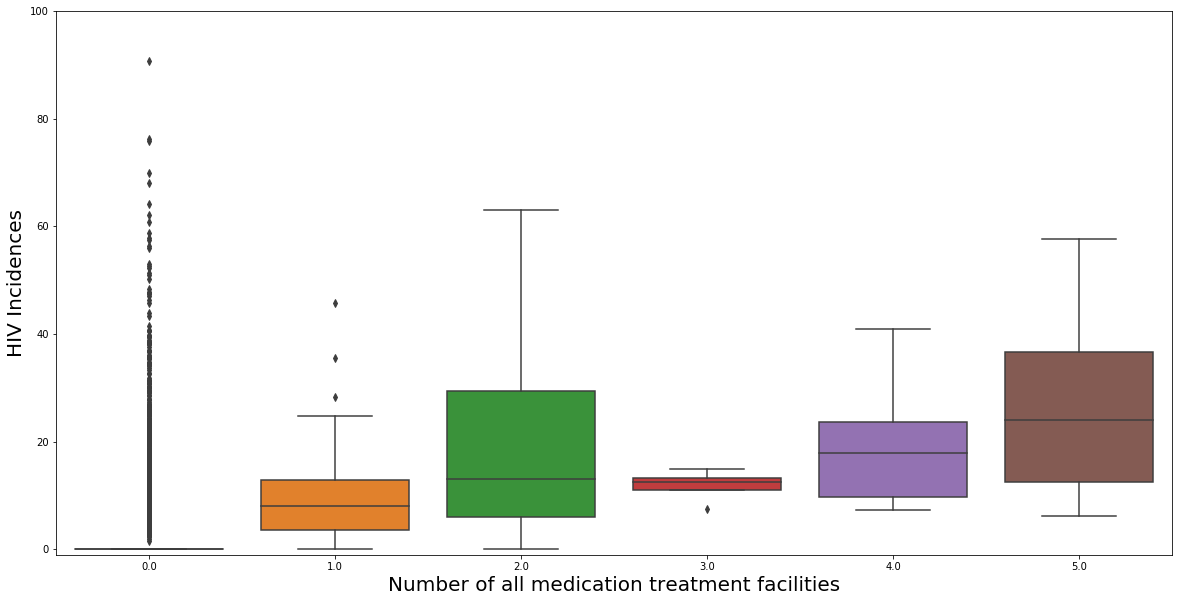

In [213]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='Med_AMAT_fac', y="HIVincidence", data=opiod_df_15)
plt.ylim(-1, 100)
plt.ylabel('HIV Incidences', fontsize=20)
plt.xlabel('Number of all medication treatment facilities', fontsize=20)

(0, 150)

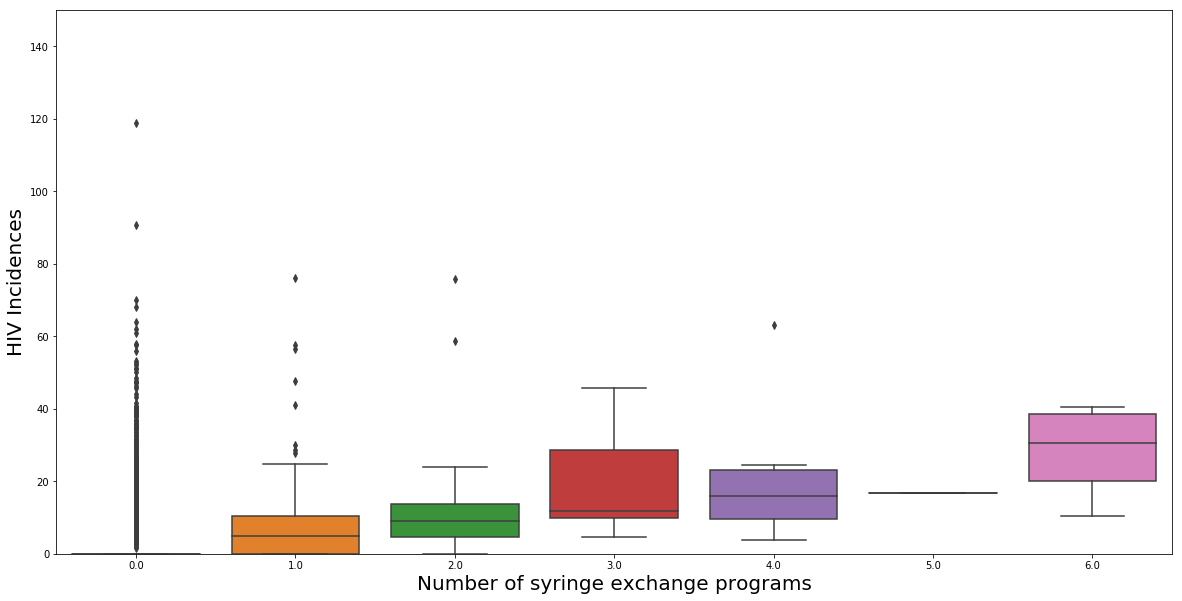

In [265]:
plt.subplots(figsize=(20,10))
sns.boxplot(x="num_SSPs", y="HIVincidence", data=opiod_df_15)
plt.ylabel('HIV Incidences', fontsize=20)
plt.xlabel('Number of syringe exchange programs', fontsize=20)
#plt.xlim(xmin=-1, xmax=150)
plt.ylim(ymin=0, ymax=150)

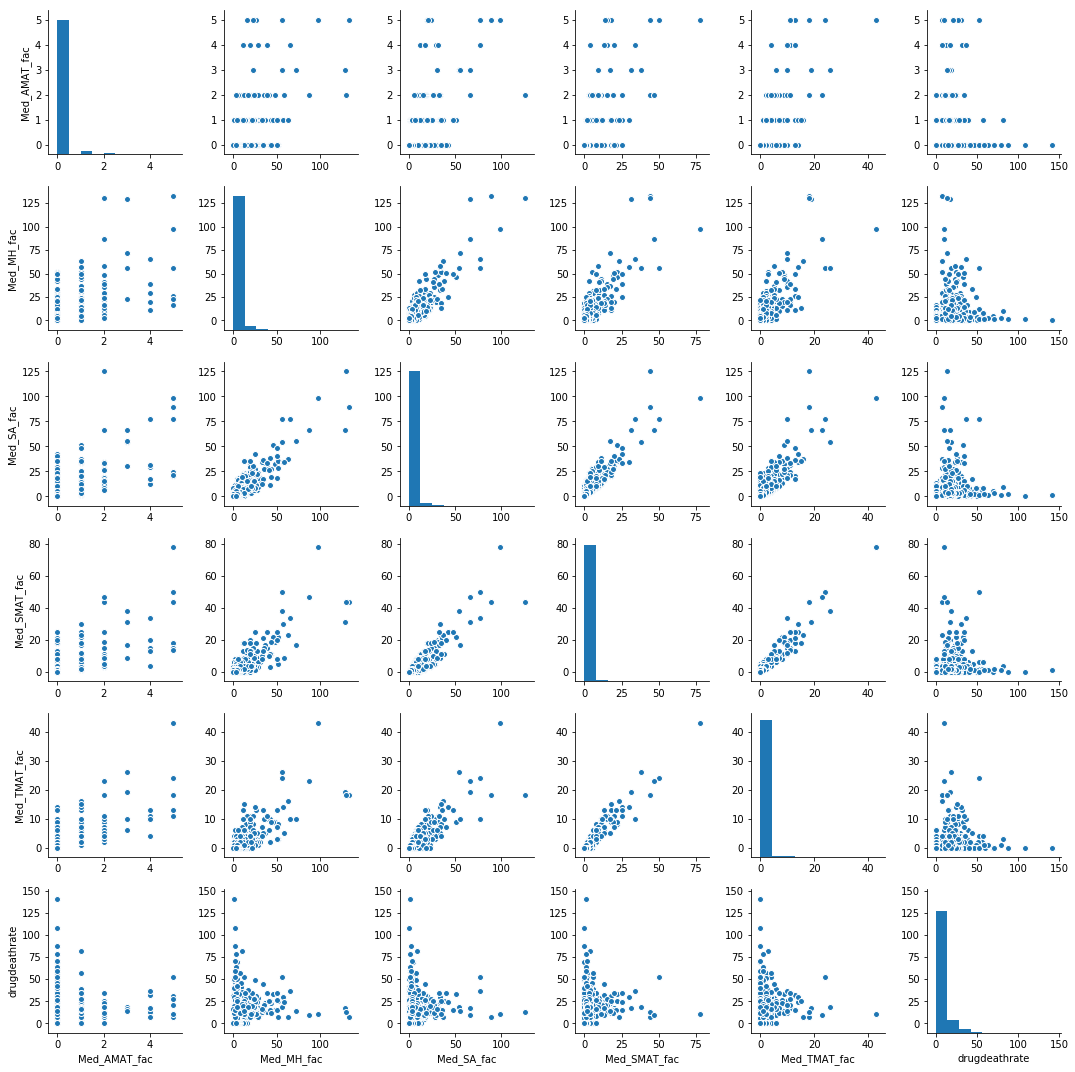

In [308]:
g = sns.pairplot(opiod_df_15, vars=['Med_AMAT_fac', 
                                    'Med_MH_fac', 
                                    'Med_SA_fac', 
                                    'Med_SMAT_fac',
                                    'Med_TMAT_fac',
                                    'drugdeathrate'])

In [310]:
msm_hiv_df = opiod_df_15.merge(msm_df, on='county_code' )
msm_hiv_df.head()

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,0.0,2.0,2.56,95.70,5.12,19410,333,514,1.715611,2.648120
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,0.0,13.0,2.54,91.34,5.27,69724,925,1429,1.326659,2.049509
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,0.0,0.0,2.54,91.34,5.27,11567,82,127,0.708913,1.097951
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,0.0,0.0,2.58,91.86,5.62,9508,119,184,1.251578,1.935212
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,0.0,1.0,2.58,91.86,5.62,21368,601,928,2.812617,4.342943


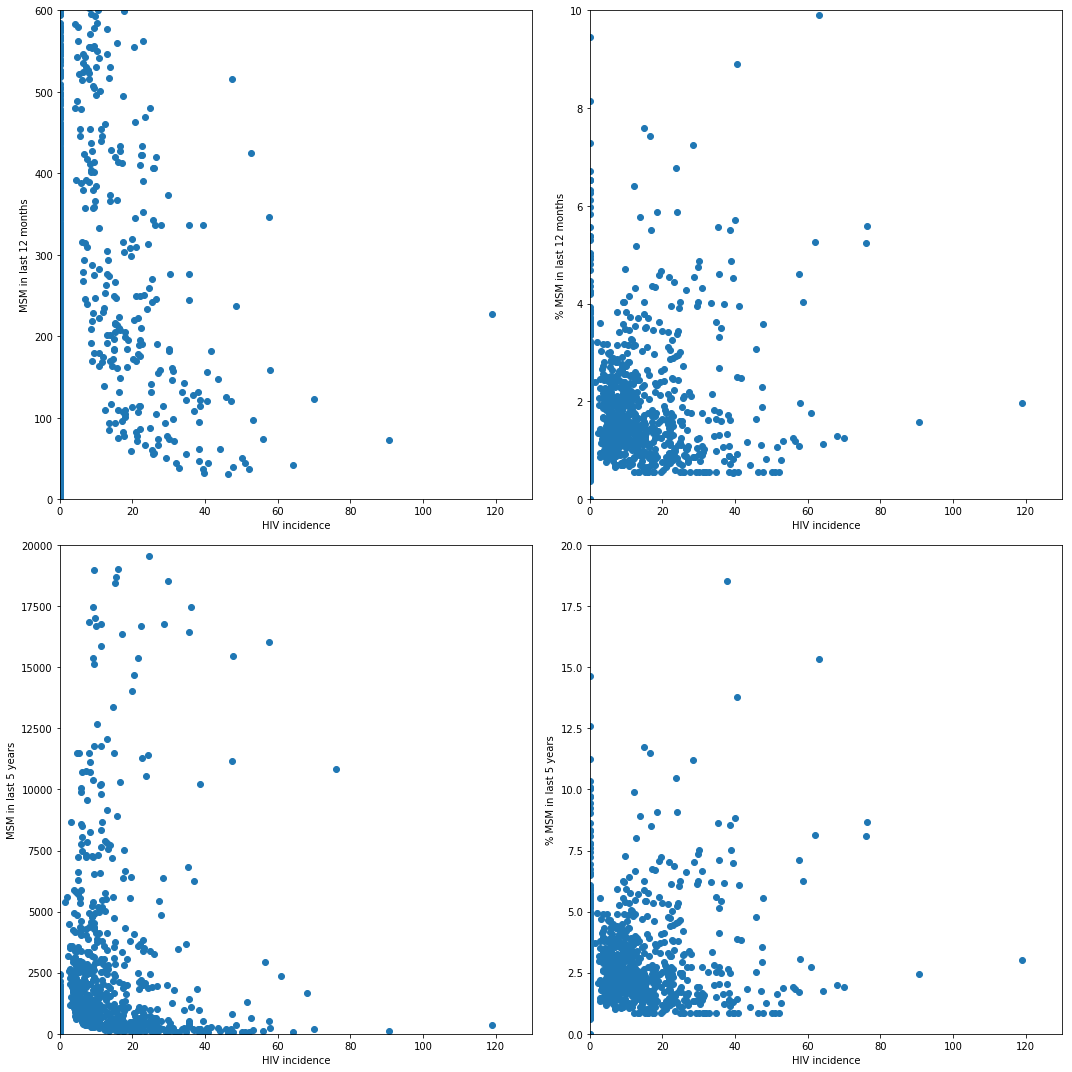

In [324]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.scatter(msm_hiv_df.HIVincidence, msm_hiv_df.MSM12MTH)
ax1.set_xlim(xmin=0, xmax=130)
ax1.set_ylim(ymin=0, ymax=600)
#ax1.set_title('HIV incidence vs prevalence')
ax1.set_xlabel('HIV incidence')
ax1.set_ylabel('MSM in last 12 months')

ax2 = fig.add_subplot(222)
ax2.scatter(msm_hiv_df.HIVincidence, msm_hiv_df['%msm12month'])
ax2.set_xlim(xmin=0, xmax=130)
ax2.set_ylim(ymin=0, ymax=10)
#ax2.set_title('HIV incidence vs prevalence')
ax2.set_xlabel('HIV incidence')
ax2.set_ylabel('% MSM in last 12 months')

ax3 = fig.add_subplot(223)
ax3.scatter(msm_hiv_df.HIVincidence, msm_hiv_df.MSM5YEAR)
ax3.set_xlim(xmin=0, xmax=130)
ax3.set_ylim(ymin=0, ymax=20000)
#ax3.set_title('HIV incidence vs prevalence')
ax3.set_xlabel('HIV incidence')
ax3.set_ylabel('MSM in last 5 years')

ax4 = fig.add_subplot(224)
ax4.scatter(msm_hiv_df.HIVincidence, msm_hiv_df['%msm5yr'])
ax4.set_xlim(xmin=0, xmax=130)
ax4.set_ylim(ymin=0, ymax=20)
#ax4.set_title('HIV incidence vs prevalence')
ax4.set_xlabel('HIV incidence')
ax4.set_ylabel('% MSM in last 5 years')

plt.tight_layout()

In [330]:
df_employment = pd.read_csv("data/ACS_14_5YR_employment/ACS_14_5YR_S2301_with_ann.csv", encoding = "ISO-8859-1", skiprows=1)
df_employment = df_employment[['Id2', 'Unemployment rate; Estimate; Population 16 years and over']]
df_employment.columns = ['county_code', 'unemployment_rate']
df_employment.head()

,county_code,unemployment_rate
0,1001,8.5
1,1003,8.6
2,1005,14.2
3,1007,10.9
4,1009,9.3


Text(0.5,1,'Unemployment rate by county')

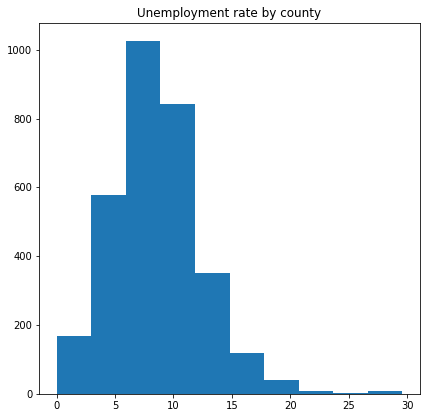

In [344]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.hist(df_employment.unemployment_rate, bins=200)
#ax1.set_xlim(xmin=0, xmax=2000)
#ax1.set_ylim(ymin=0, ymax=500)
ax1.set_title('Unemployment rate by county')

In [338]:
df_poverty = pd.read_csv("data/ACS_14_5YR_poverty/ACS_14_5YR_S1701_with_ann.csv", encoding = "ISO-8859-1", skiprows=1)
df_poverty = df_poverty[['Id2', 'Percent below poverty level; Estimate; Population for whom poverty status is determined']]
df_poverty.columns = ['county_code', 'poverty_rate']
df_poverty.head()

/Users/elogue01/anaconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13,14,19,20,193,194,265,266) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,county_code,poverty_rate
0,1001,12.8
1,1003,13.8
2,1005,24.1
3,1007,17.0
4,1009,17.3


Text(0.5,1,'Poverty rate by county')

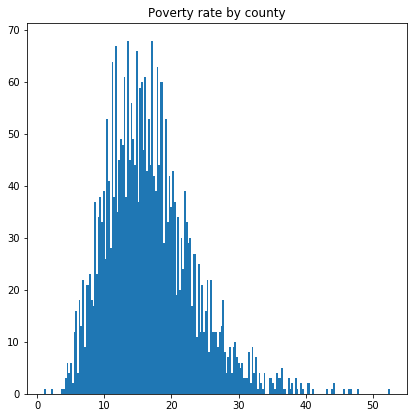

In [346]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.hist(df_poverty.poverty_rate, bins=200)
#ax1.set_xlim(xmin=0, xmax=2000)
#ax1.set_ylim(ymin=0, ymax=500)
ax1.set_title('Poverty rate by county')

In [341]:
df_income = pd.read_csv("data/ACS_14_5YR_income/ACS_14_5YR_S1901_with_ann.csv", encoding = "ISO-8859-1", skiprows=1)
df_income = df_income[['Id2', 'Households; Estimate; Total']]
df_income.columns = ['county_code', 'household_income']
df_income.head()

,county_code,household_income
0,1001,20304
1,1003,73058
2,1005,9145
3,1007,7078
4,1009,20934


Text(0.5,1,'Household Income by county')

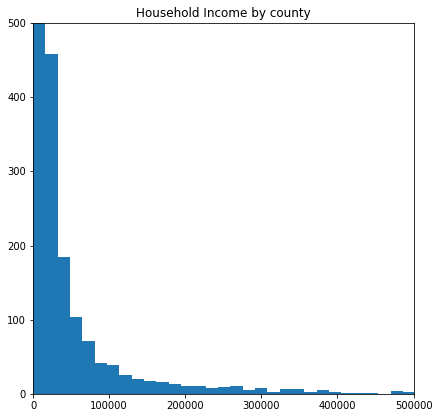

In [348]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.hist(df_income.household_income, bins=200)
ax1.set_xlim(xmin=0, xmax=500000)
ax1.set_ylim(ymin=0, ymax=500)
ax1.set_title('Household Income by county')

In [350]:
msm_hiv_econ_df = msm_hiv_df.merge(df_employment, on='county_code')
msm_hiv_econ_df = msm_hiv_econ_df.merge(df_poverty, on='county_code')
msm_hiv_econ_df = msm_hiv_econ_df.merge(df_income, on='county_code')
msm_hiv_econ_df.head()

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


Text(0,0.5,'Household income')

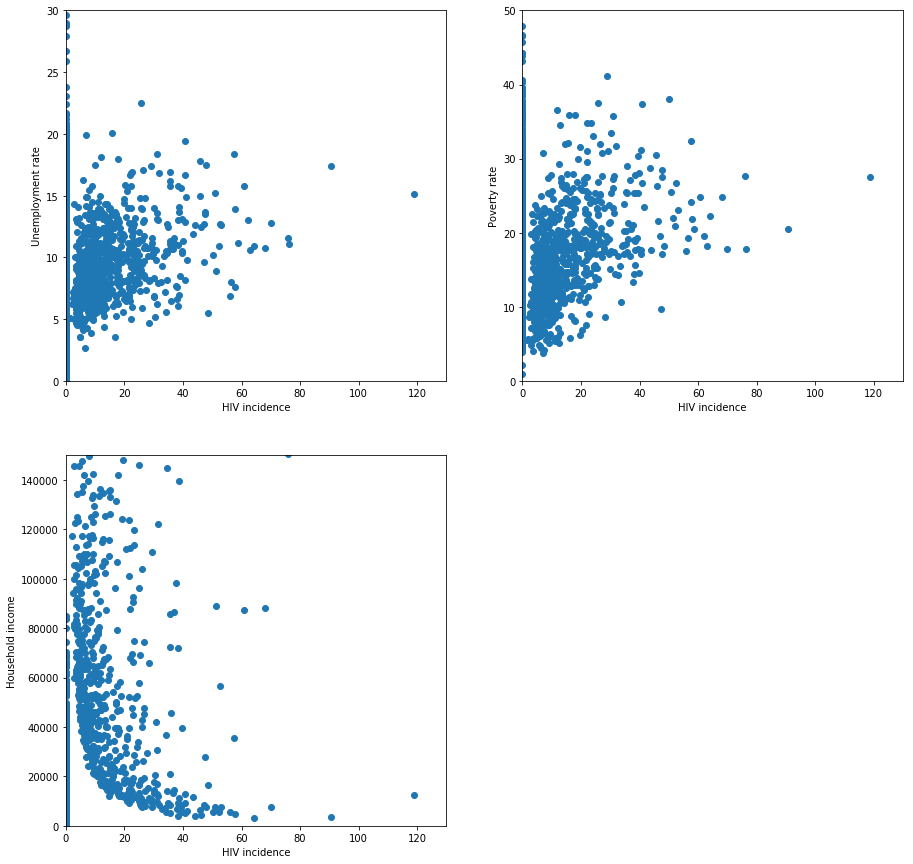

In [354]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.scatter(msm_hiv_econ_df.HIVincidence, msm_hiv_econ_df.unemployment_rate)
ax1.set_xlim(xmin=0, xmax=130)
ax1.set_ylim(ymin=0, ymax=30)
#ax1.set_title('HIV incidence vs prevalence')
ax1.set_xlabel('HIV incidence')
ax1.set_ylabel('Unemployment rate')

ax2 = fig.add_subplot(222)
ax2.scatter(msm_hiv_econ_df.HIVincidence, msm_hiv_econ_df.poverty_rate)
ax2.set_xlim(xmin=0, xmax=130)
ax2.set_ylim(ymin=0, ymax=50)
#ax2.set_title('HIV incidence vs prevalence')
ax2.set_xlabel('HIV incidence')
ax2.set_ylabel('Poverty rate')

ax3 = fig.add_subplot(223)
ax3.scatter(msm_hiv_econ_df.HIVincidence, msm_hiv_econ_df.household_income)
ax3.set_xlim(xmin=0, xmax=130)
ax3.set_ylim(ymin=0, ymax=150000)
#ax3.set_title('HIV incidence vs prevalence')
ax3.set_xlabel('HIV incidence')
ax3.set_ylabel('Household income')


Text(0,0.5,'Log Household income')

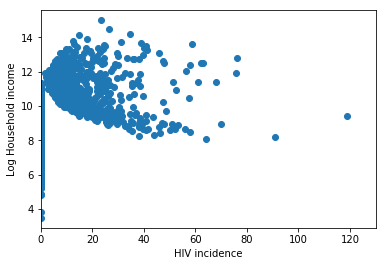

In [360]:
msm_hiv_econ_df['log_household_income'] = np.log(msm_hiv_econ_df.household_income)

fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.scatter(msm_hiv_econ_df.HIVincidence, msm_hiv_econ_df.log_household_income)
ax3.set_xlim(xmin=0, xmax=130)
#ax3.set_ylim(ymin=0, ymax=150000)
#ax3.set_title('HIV incidence vs prevalence')
ax3.set_xlabel('HIV incidence')
ax3.set_ylabel('Log Household income')